In [1]:
%matplotlib inline
import os
import MySQLdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
connection = MySQLdb.connect(
    host='localhost', user='root', passwd='', db='minarepo', charset='utf8')

In [3]:
# df_zansa = pd.io.sql.read_sql_query(
#     'select id as rid, user, ST_X(geo) as lat, ST_Y(geo) as lng, timestamp, comment '
#     'from minarepo ' 
#     'where type="ps_zansa"'
#     'and image!="" '
#     'and comment != "" '
#     'and timestamp > "2016-10-06";' , connection)
df_zansa = pd.io.sql.read_sql_query(
    'select minarepo.id as rid, ST_X(minarepo.geo) as lat, ST_Y(minarepo.geo) as lng, minarepo.timestamp, category.category '
    'from minarepo, category '
    'where minarepo.type="ps_zansa" '
    'and minarepo.image!="" '
    'and minarepo.comment != "" '
    'and minarepo.timestamp > "2016-10-06" '
    'and minarepo.id = category.rid '
    ';' , connection)

In [4]:
df_zansa

,rid,lat,lng,timestamp,category
0,213,35.395222,139.449933,2016-10-06 10:12:26,枕類
1,213,35.395222,139.449933,2016-10-06 10:12:26,布団類
2,408,35.395417,139.449800,2016-10-12 16:36:02,絨毯類
3,409,35.395327,139.449652,2016-10-12 16:39:52,不明
4,413,35.408566,139.458563,2016-10-14 09:33:55,その他
5,415,35.409106,139.461796,2016-10-14 09:43:52,その他
6,415,35.409106,139.461796,2016-10-14 09:43:52,不燃ゴミ
7,416,35.421238,139.464186,2016-10-14 09:54:23,布団類
8,416,35.421238,139.464186,2016-10-14 09:54:23,傘類
9,419,35.422893,139.463806,2016-10-14 10:11:20,鞄類


# カテゴリ

In [5]:
categories = {
    "布団類":"(?!座布団)布団|ふとん|ベッド|ベット|マットレス|パット",
    "絨毯類": "(?!マットレス)じゅうたん|カーペット|ジュータン|絨毯|マット|じゅーたん|敷物|ござ|ゴザ",
    "鞄類": "かばん|バッグ|バック|リュック|鞄|カバン",
    "座布団": "座布団",
    "枕類": "枕|まくら|マクラ",
    "クッション類":"クッション|くっしょん",
    "靴類":"靴|くつ|クツ|サンダル",
    "椅子類":"イス|いす|椅子|座椅子|座いす",
    "ダンボール類":"ダンボール|段ボール",
    "傘類":"傘|かさ|カサ",
    "プラスチック類":"プラ",
    "発泡スチロール":"発泡|ハッポー|スチロール",
    "家電製品":"[電機]|ストーブ|テレビ|ビデオ|CD|DVD|コンロ",
    "不燃ゴミ": "不燃",
    "可燃ゴミ": "可燃",
    "紙類":"紙|雑誌|雑がみ|新聞",
    "スリッパ": "スリッパ",
    "その他":"その他|ゴミ|ごみ"
}

In [6]:
# df_category = df_zansa[["rid", "comment"]]
# total = []

In [7]:
# for k, v in categories.items():
#     total.append(df_category[df_category.comment.str.contains(v)].copy())
#     total[-1]["category"] = k

In [8]:
# total_categories = pd.concat(total)

In [9]:
# result = pd.merge(df_category, total_categories.sort_values(by=["rid"], ascending=True), how='outer', on='rid')

In [10]:
# result

In [11]:
# result.category[result.category.isnull()] = '不明'

In [12]:
# result = result[['rid', 'category']]

In [13]:
# import sqlalchemy as sa
# url = 'mysql+pymysql://root:@localhost/minarepo?charset=utf8'
# engine = sa.create_engine(url, echo=True)
# result.to_sql('category', engine, index=False)


# 3次地域メッシュ

In [14]:
def calc_mesh3 (dlat, dlng):
    mc_1_la_p = dlat * 60 // 40
    mc_1_ln_u = (dlng - 100) // 1
    mc_2_la_q = dlat * 60 % 40 // 5
    mc_2_ln_v = ((dlng - 100) % 1) * 60 // 7.5
    mc_3_la_r = dlat * 60 % 40 % 5 * 60 // 30
    mc_3_ln_w = ((dlng - 100) % 1) * 60 % 7.5 * 60 // 45
    mc = mc_1_la_p * 1000000 + mc_1_ln_u * 10000 + mc_2_la_q * 1000 + mc_2_ln_v * 100 + mc_3_la_r * 10 + mc_3_ln_w
    
    return mc

In [15]:
s_mesh3 = calc_mesh3(df_zansa.lat,df_zansa.lng).astype('int32')

In [16]:
s_mesh3.name = 'third_meshcode'

In [17]:
df_zansa = pd.concat([df_zansa, s_mesh3], axis=1)

In [18]:
df_zansa = df_zansa[df_zansa.third_meshcode>0]

# 統計処理

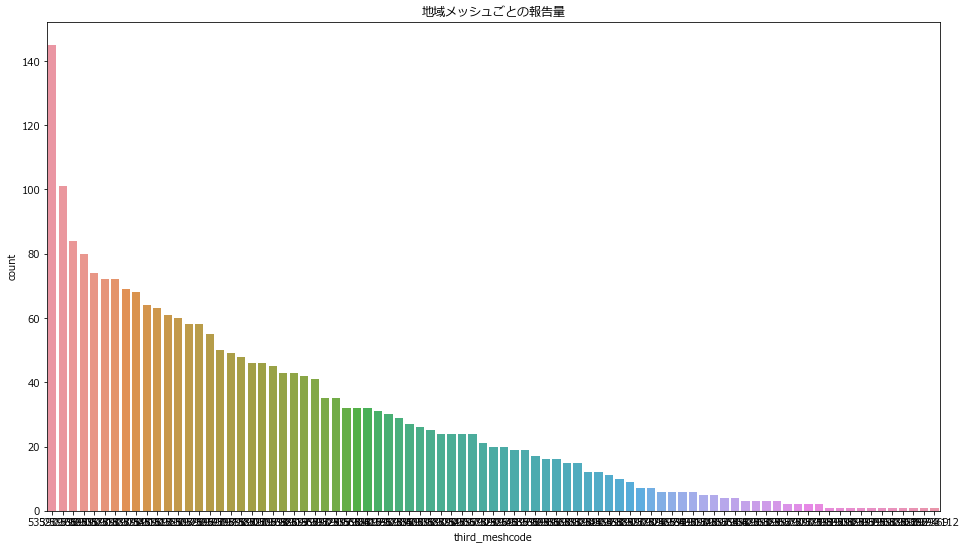

In [19]:
plt.figure(figsize=(16, 9))
plt.title('地域メッシュごとの報告量')
sns.countplot(x='third_meshcode', data=df_zansa, order=df_zansa.third_meshcode.value_counts().index)

In [20]:
time_zansa = df_zansa[['timestamp', 'third_meshcode']]
time_zansa = time_zansa.set_index('timestamp')

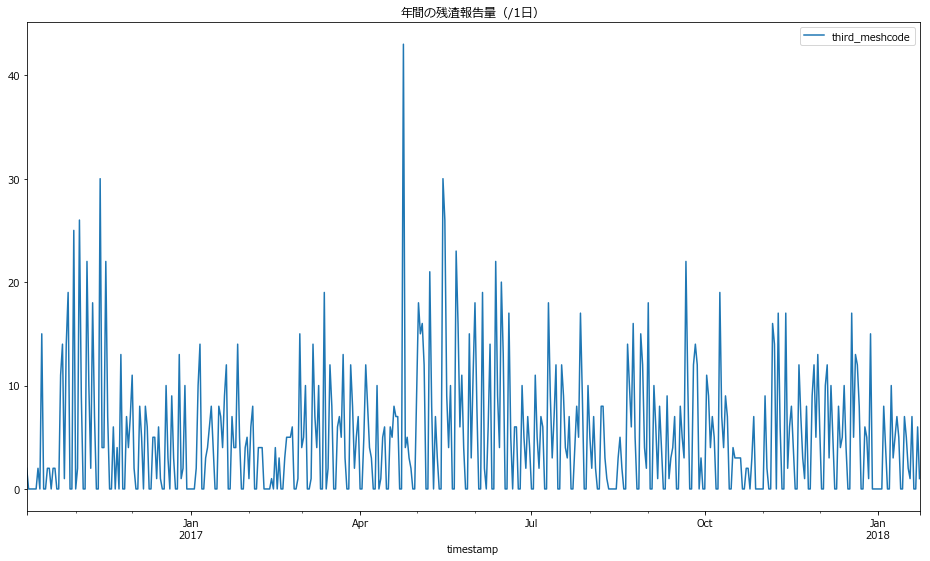

In [21]:
time_zansa.resample('D').count().plot(title="年間の残渣報告量（/1日）", figsize=(16, 9))

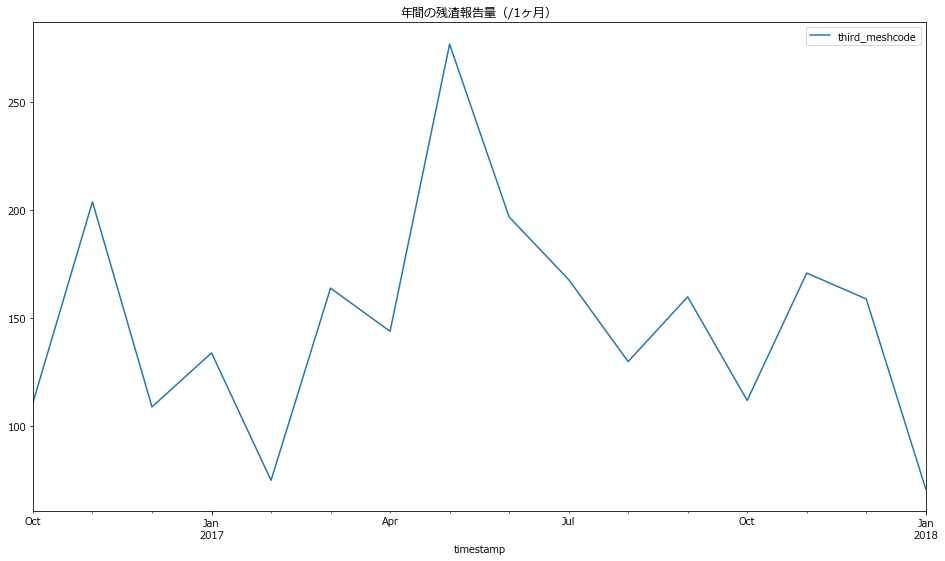

In [22]:
time_zansa.resample('M').count().plot(title="年間の残渣報告量（/1ヶ月）", figsize=(16, 9))

# ヒートマップ

In [23]:
import folium
from folium.plugins import HeatMap

In [60]:
todohuken_map = folium.Map(location=[35.33917, 139.490036], zoom_start=12.5)
coordinates = []
for i, (lat, lng) in df_zansa[["lat", "lng"]].iterrows():
#     folium.Marker((lat, lng),popup=str(i)).add_to(todohuken_map)
    coordinates.append((lat, lng))
todohuken_map.add_child(HeatMap(coordinates, radius=20, blur=20))
todohuken_map

In [25]:
# import sqlalchemy as sa
# url = 'mysql+pymysql://root:@localhost/minarepo?charset=utf8'
# engine = sa.create_engine(url, echo=True)
# fujisawa_meshcode.to_sql('fujisawa_meshcode', engine, index=False)

In [28]:
df_zansa

,rid,lat,lng,timestamp,category,third_meshcode
0,213,35.395222,139.449933,2016-10-06 10:12:26,枕類,53390375
1,213,35.395222,139.449933,2016-10-06 10:12:26,布団類,53390375
2,408,35.395417,139.449800,2016-10-12 16:36:02,絨毯類,53390375
3,409,35.395327,139.449652,2016-10-12 16:39:52,不明,53390375
4,413,35.408566,139.458563,2016-10-14 09:33:55,その他,53390396
5,415,35.409106,139.461796,2016-10-14 09:43:52,その他,53390396
6,415,35.409106,139.461796,2016-10-14 09:43:52,不燃ゴミ,53390396
7,416,35.421238,139.464186,2016-10-14 09:54:23,布団類,53391307
8,416,35.421238,139.464186,2016-10-14 09:54:23,傘類,53391307
9,419,35.422893,139.463806,2016-10-14 10:11:20,鞄類,53391307


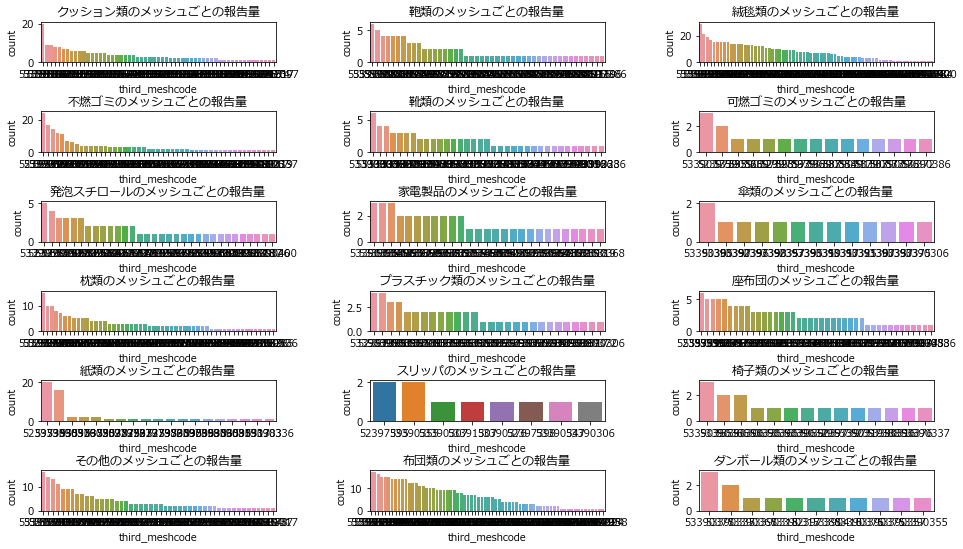

In [41]:
plt.figure(figsize=(16, 9))
plt.subplots_adjust(wspace=0.4, hspace=1.2)
for i, k in enumerate(categories.keys()):
    plt.subplot(6,3, i+1)
    plt.title('{}のメッシュごとの報告量'.format(k))
    sns.countplot(x='third_meshcode', data=df_zansa[df_zansa.category==k], order=df_zansa[df_zansa.category==k].third_meshcode.value_counts().index)

In [43]:
time_zansa = df_zansa[['timestamp', 'third_meshcode', "category"]]
time_zansa = time_zansa.set_index('timestamp')

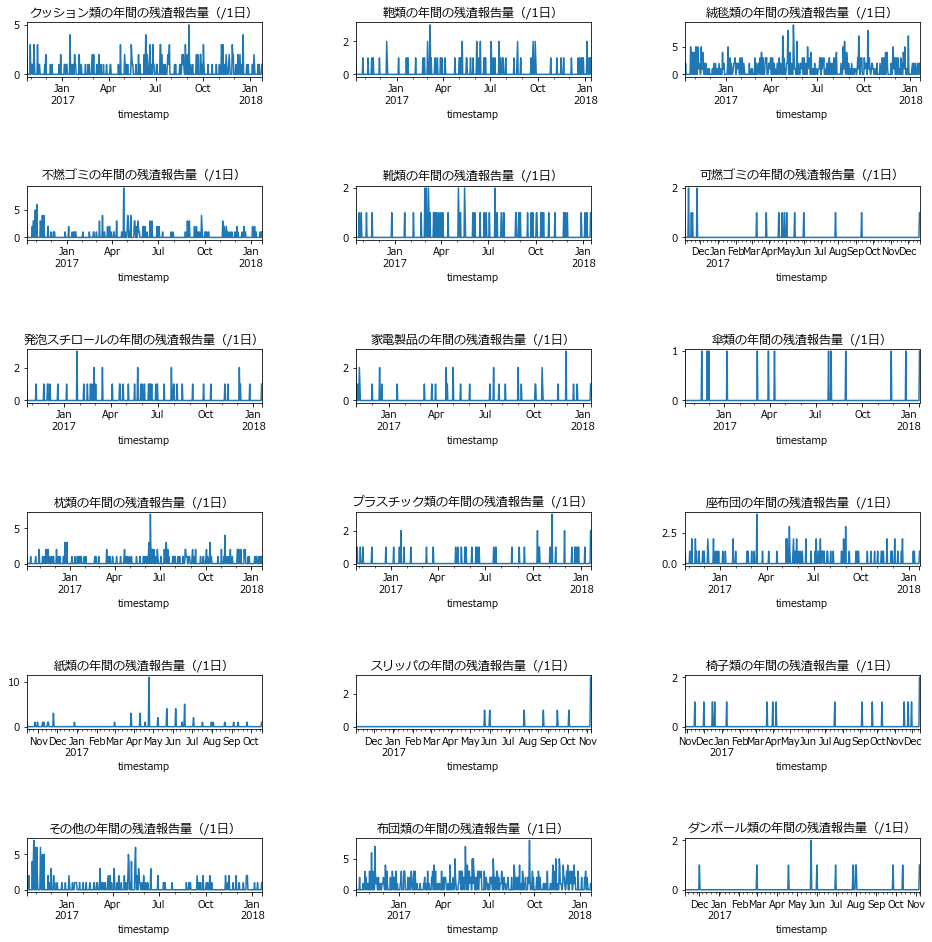

In [59]:
plt.figure(figsize=(16, 12))
plt.subplots_adjust(wspace=0.4, hspace=2)
for i, k in enumerate(categories.keys()):
    plt.subplot(6,3, i+1)
    time_zansa[time_zansa.category==k].resample('D').third_meshcode.count().plot(title="{}の年間の残渣報告量（/1日）".format(k), figsize=(16, 16))

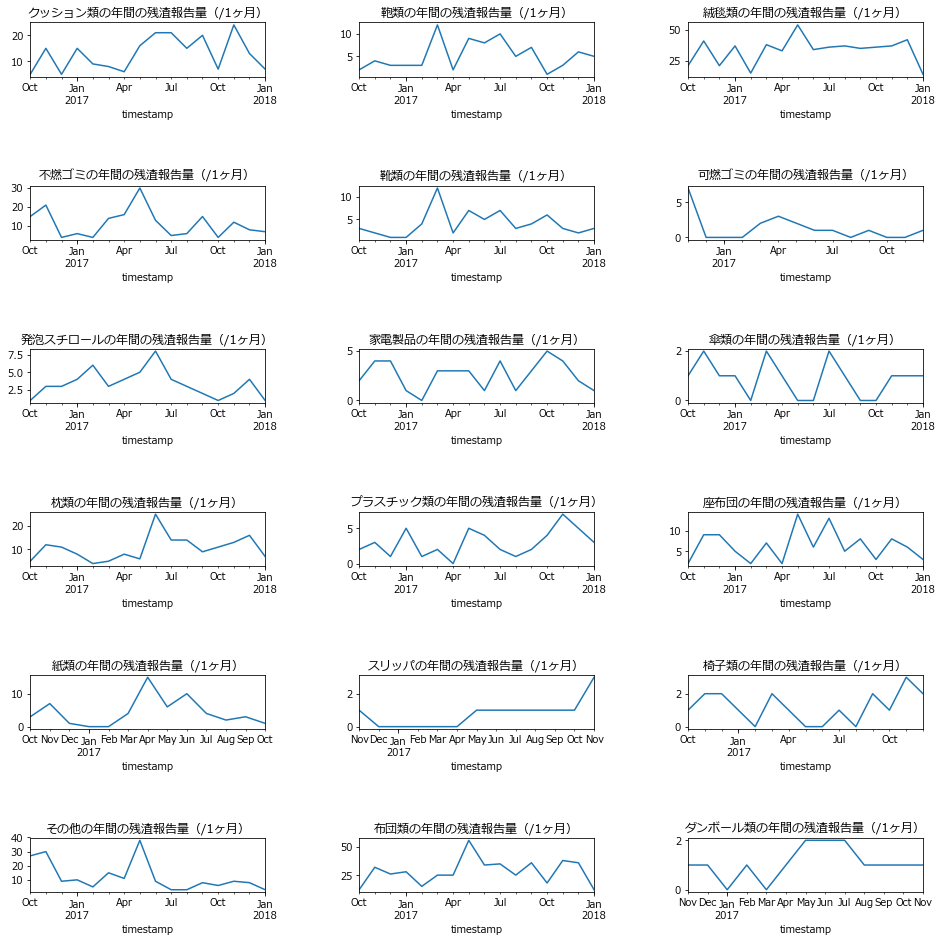

In [61]:
plt.figure(figsize=(16, 12))
plt.subplots_adjust(wspace=0.4, hspace=2)
for i, k in enumerate(categories.keys()):
    plt.subplot(6,3, i+1)
    time_zansa[time_zansa.category==k].resample('M').third_meshcode.count().plot(title="{}の年間の残渣報告量（/1ヶ月）".format(k), figsize=(16, 16))